In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
df = pd.read_csv('data/perrin-freres-monthly-champagne.csv',
                 index_col='Month',
                 skipfooter=2,
                 parse_dates=True)
df

<ipython-input-4-4e0e47c9eed7>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('data/perrin-freres-monthly-champagne.csv',


,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


In [7]:
!head data/perrin-freres-monthly-champagne.csv

Month,Perrin Freres monthly champagne sales millions ?64-?72
1964-01,2815
1964-02,2672
1964-03,2755
1964-04,2721
1964-05,2946
1964-06,3036
1964-07,2282
1964-08,2212
1964-09,2922


In [10]:
df.columns=['Sales']

In [9]:
df.index.freq="MS"

<AxesSubplot:xlabel='Month'>

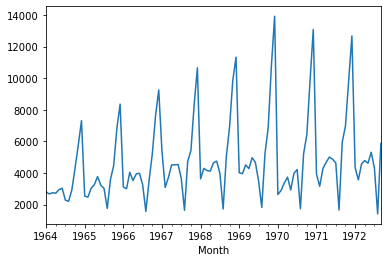

In [11]:
df['Sales'].plot()

In [12]:
N_test = 12
train=df.iloc[:-N_test]
test=df.iloc[-N_test:]

In [13]:
train_idx=df.index <=train.index[-1]
test_idx=df.index >train.index[-1]

In [14]:
hw=ExponentialSmoothing(train['Sales'],
                        initialization_method='legacy-heuristic',
                        trend='add',
                        seasonal='add',
                        seasonal_periods=12)
res=hw.fit()

In [15]:
df.loc[train_idx,"HoltWinterTrain"]=res.fittedvalues
df.loc[test_idx,"HoltWinterTest"]=res.forecast(N_test)

<AxesSubplot:xlabel='Month'>

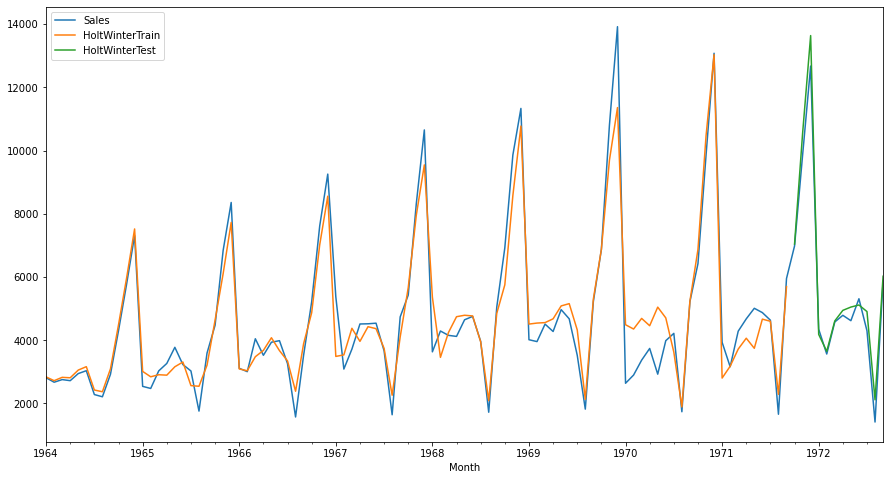

In [18]:
df[["Sales","HoltWinterTrain","HoltWinterTest"]].plot(figsize=(15,8))

In [19]:
r2_score(train["Sales"],res.fittedvalues)

0.9173444388265242

In [20]:
r2_score(test["Sales"],res.forecast(N_test))

0.9735859300883493